In [129]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

100


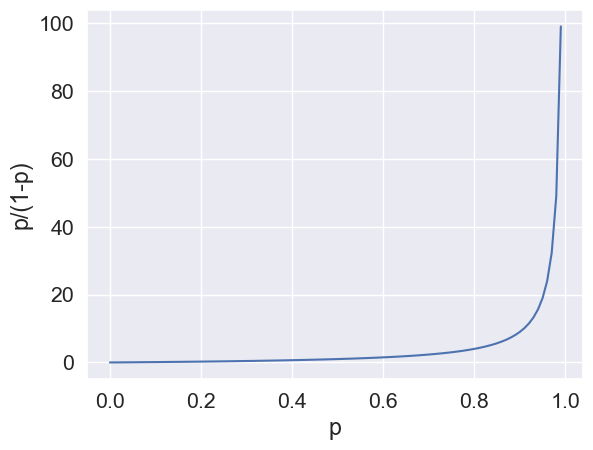

In [130]:
# odds ratio
# 성공확률과 실패 확률의 비율을 나타내는 값
# p / (1-p) p=성공확률
# p가 0에서 1까지 증가할 때 오즈비는 처음에 천천히 증가하지만
# p가 1에 가까워지면 급격히 증가

probs = np.arange(0,1,0.01)
print(len(probs))

odds=[p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()

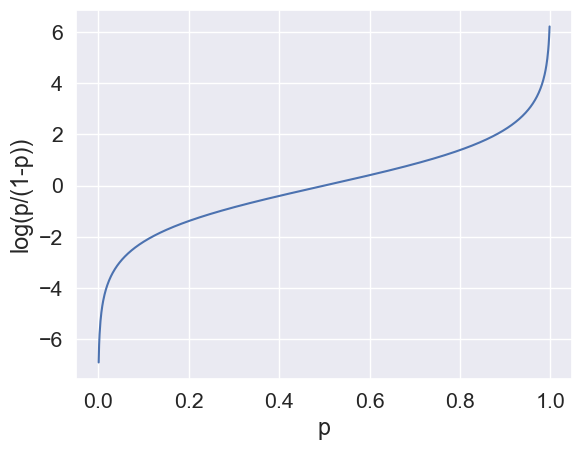

In [131]:
#logit 함수
#오즈 비에 로그 함수를 취하여 만든 함수
# log( p / (1-p) ) = z
# p가 0.5일 때 0이 되고 p가 0과 1일 때 각각 무한대로 
# 음수와 양수가 되는 특징

probs = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.show()

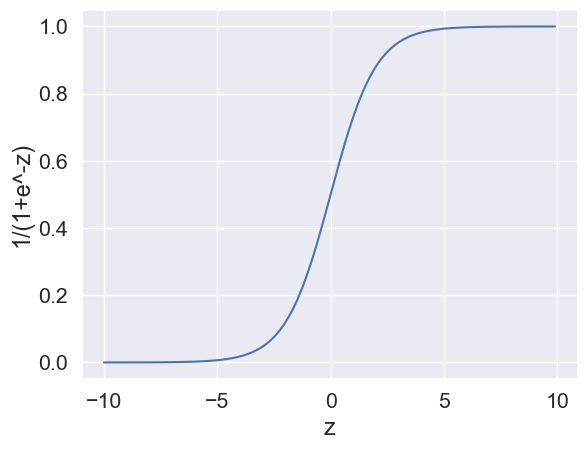

In [132]:
# log( p / (1-p) ) = z
# 위의 식을 z에 대해 정리한 식(로지스틱 함수, sigmoid 함수라고도 함)
# logit 함수의 x,y축이 바뀐 모양
# p = 1/(1+e^-z)

zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

* forge 데이터셋

In [133]:
%matplotlib inline
from matplotlib import pyplot as plt
import mglearn
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

X.shape: (26, 2)


c:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


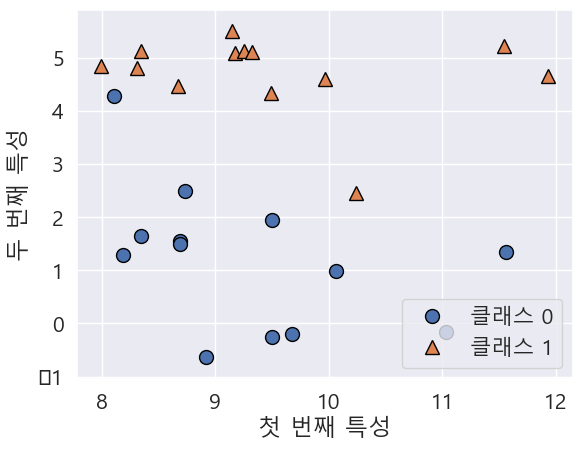

In [134]:
#plt.rcParams['figure.dpi'] = 300
# forge 데이터셋 생성
X, y = mglearn.datasets.make_forge()

# 산점도 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['클래스 0', '클래스 1'], loc=4)
plt.xlabel('첫 번째 특성')
plt.ylabel('두 번째 특성')
print("X.shape: {}".format(X.shape))    #데이터포인트 26개와 특성 2개

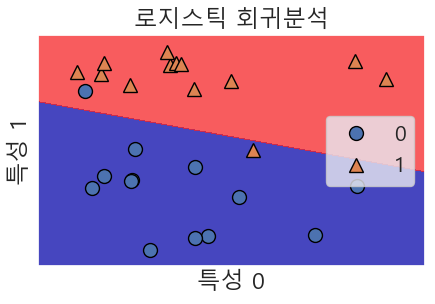

In [135]:
#분류용 선형 모델(로지스틱 회귀)
#로지스틱 회귀분석은 회귀분석이 아니라 분류 알고리즘에 해당됨
from sklearn.linear_model import LogisticRegression
fig, axes = plt.subplots(1,1,figsize=(5,3))
#모델을 학습
model = LogisticRegression()
model = model.fit(X,y)
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, ax=axes, alpha=.7)

#산점도 그리기
mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=axes)
axes.set_title("로지스틱 회귀분석")
axes.set_xlabel("특성 0")
axes.set_ylabel("특성 1")
axes.legend()

#결정경계가 직선으로 표현되었고
#위쪽 클래스1
#아래쪽 클래스 0
#새로운 데이터가 직선 위에 놓이면 클래스1
#반대로 직선 아래쪽에 놓이면 클래스 0
#포인트 2개가 잘못 분류됨

In [136]:
# 분류 정확도
model.score(X,y)

0.9230769230769231

In [137]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X)
cm=confusion_matrix(y,pred) #실제값, 출력값
cm

array([[12,  1],
       [ 1, 12]], dtype=int64)

##### 로지스틱 함수와 모형

In [138]:
import numpy as np
# 1원을 1년 저축 100% 이자 => 원금 1원 , 이자 1원 => 2원
# 복리라면 1원을 6개월씩 나누어 저축, 1+0.5, 1원에 대한 이자 0.5, 0.5에 대한 이자 0.25
# => 2.25
# 365일 투자하고 계속 나누어서 투자한다면 1년에 최대 2.71828... 을 얻을 수 있다
print(np.e) #오일러 상수
print(np.exp(1)) #y=e의 1승
print(np.exp(2)) #y=e의 2승

2.718281828459045
2.718281828459045
7.38905609893065


(-0.1, 1.1)

c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


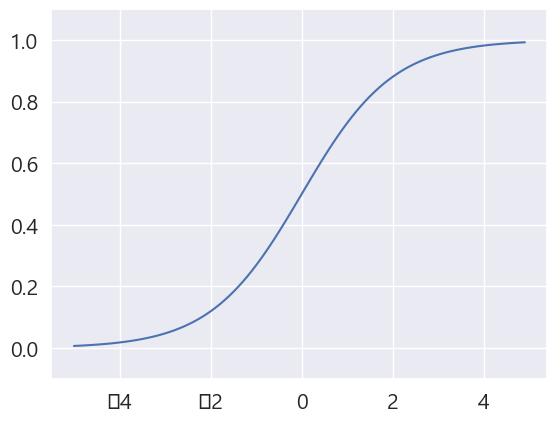

In [139]:
#로지스틱 함수는 시그모이드 함수의 일종 : S자 모양의 함수
# 0.0~1.0 사이의 실수값
%matplotlib inline
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
X = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.ylim(-0.1, 1.1)

In [140]:
# n_samples : 표본 데이터의 수, 디폴트 100
# n_features : 독립 변수의 수, 디폴트 20
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
# n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
# random_state : 난수 발생 시드
from sklearn.datasets import make_classification
import statsmodels.api as sm
X, y = make_classification(n_features=1, n_redundant=0,
        n_informative=1, n_clusters_per_class=1, random_state=4)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.162261
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.7658
Time:                        15:39:53   Log-Likelihood:                -16.226
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.1866      0.884      4.738      0.000       2.455       5.919


In [141]:
#예측값은 0.0~1.0 사이의 실수값
result=logit_res.predict(X)[:5]
print(result)
# 0.5 이상이면 1, 미만이면 0으로 분류함
for a in result:
    print(int(round(a)),end=' ')

[0.08580852 0.99949403 0.00370571 0.99933961 0.30472943]
0 1 0 1 0 

c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


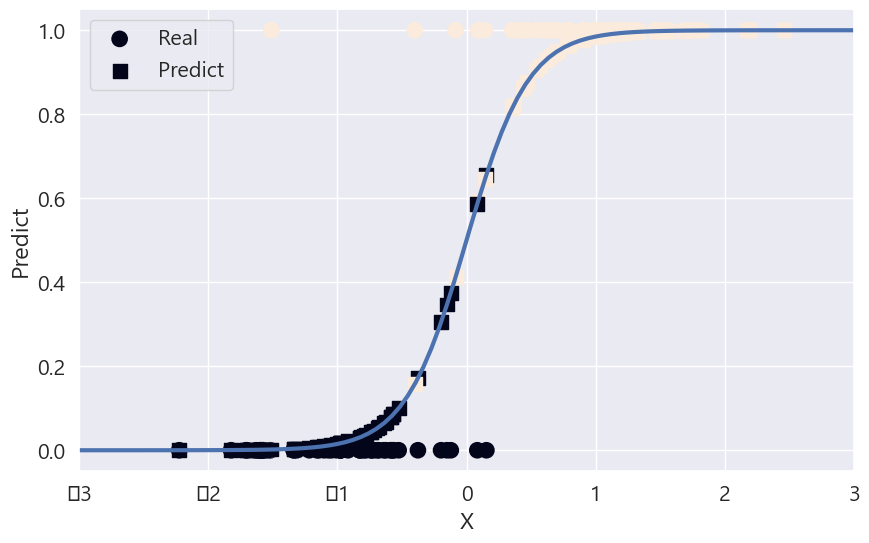

In [142]:
xx = np.linspace(-3, 3, 100)
pred = logit_res.predict(xx) #모형이 예측한 값
plt.figure(figsize=(10,6))
plt.plot(xx, pred, lw=3) #lw: line width
plt.scatter(X, y, c=y, s=100, lw=2, label='Real')
plt.scatter(X, logit_res.predict(X), label='Predict',
            marker='s', c=y, s=100, lw=1)
plt.xlim(-3, 3)
plt.xlabel('X')
plt.ylabel('Predict')
plt.legend()

In [143]:
#로지스틱 회귀 모형의 성능 측정
#log_loss() 로그 손실값(분류 모형의 성능을 평가할 때 사용하는 값)
# 100%의 확률로 답을 구한 경우 -log(1.0)=0
# 80% 확률 -log(0.8)=0.22314
# 60% 확률 -log(0.6)=0.51082
# 확률이 낮아질수록 log loss는 크게 증가한다.
# (확률이 낮을 때 더 많은 패널티를 부여)
from sklearn.metrics import log_loss
y_hat = logit_res.predict(X)
# normalize 정규화 여부
log_loss(y, y_hat, normalize=False)
#실제 y값의 평균
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [144]:
# y 리스트와 같은 사이즈로 값을 1로 초기화한 리스트
np.ones_like(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [145]:
#실제 y값의 평균으로 계산한 로그 손실값
y_null = np.ones_like(y) * mu_null
print(y_null)
log_loss(y, y_null, normalize=False)

[0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51]


69.29471672244784

In [146]:
#결정계수값(Pseudo R-squ.)
1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.7658389667520492

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

#사이킷런 패키지의 LogisticRegression() 함수
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

print(model.classes_) #출력값
print(model.intercept_) #절편
print(model.coef_) #회귀계수

print(model.predict_proba(X_test)) # [0일 확률, 1일 확률]
print(model.predict(X_test))
print(model.score(X_test, y_test))

[0 1]
[0.01210487]
[[2.99972644]]
[[0.00935192 0.99064808]
 [0.00428094 0.99571906]
 [0.98204208 0.01795792]
 [0.11773589 0.88226411]
 [0.10564409 0.89435591]
 [0.94862134 0.05137866]
 [0.9892088  0.0107912 ]
 [0.13379119 0.86620881]
 [0.00138017 0.99861983]
 [0.84331206 0.15668794]
 [0.8996786  0.1003214 ]
 [0.94798802 0.05201198]
 [0.91098884 0.08901116]
 [0.25466241 0.74533759]
 [0.04540992 0.95459008]
 [0.96422105 0.03577895]
 [0.99385324 0.00614676]
 [0.88332811 0.11667189]
 [0.85162766 0.14837234]
 [0.03287681 0.96712319]]
[1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1]
0.95


In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[10,  0],
       [ 1,  9]], dtype=int64)

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))
# precision(정확도, 정밀도) : 모델이 True라고 분류한 것 중에서 실제 True의 비율
# recall(재현율, 검출율) : 실제값이 True인 것 중에서 모델이 True라고 예측한 것의 비율
# f1-score : precision과 recall의 조화평균(불균형 데이터셋에 많이 사용하는 평가 지표)
# support : 실제값의 개수(0이 1개, 1이 3개)
# accuracy : 정확도
# macro avg : 단순평균(모든 클래스를 동일한 비중으로 고려)
# weighted avg : 각 클래스에 속하는 표본의 개수로 가중평균(f1-score와 같은 값)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



c:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


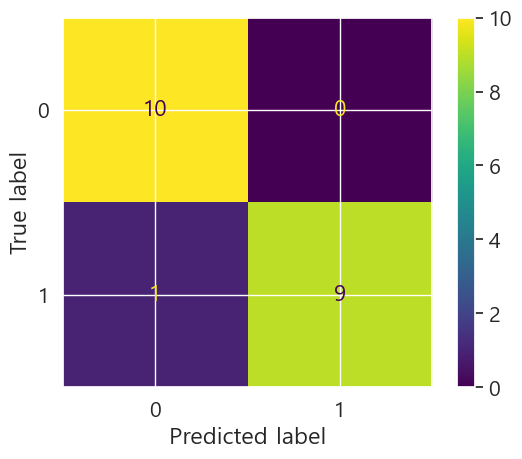

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(model, X_test, y_test)

* 미국 의대생 입학 관련 데이터셋

In [151]:
# Acceptance: 0이면 불합격, 1이면 합격
# BCPM: Bio/Chem/Physics/Math 과목의 학점 평균
# GPA: 전체과목 학점 평균
# VR: MCAT Verbal reasoning 과목 점수
# PS: MCAT Physical sciences 과목 점수
# WS: MCAT Writing sample 과목 점수
# BS: MCAT Biological sciences 과목 점수
# MCAT: MCAT 촘점
# Apps: 의대 지원 횟수

In [152]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


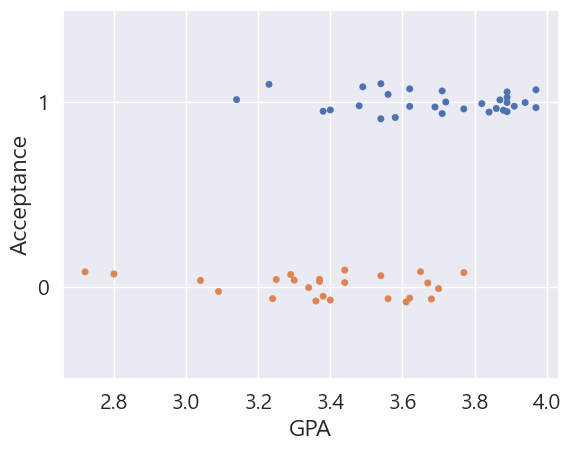

In [153]:
import seaborn as sns
# 학점과 합격여부의 상관관계
# jitter=True(데이터의 수가 많을 경우 겹치지 않도록 하는 옵션)
sns.stripplot(x="GPA", y="Acceptance", data=df_med,
                jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [154]:
#MCAT = VR + PS + WS + BS이므로 MCAT는 독립변수에서 제외
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.5913
Time:                        15:39:54   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

* 1974년 '여성은 가정을 보살피고 국가를 운영하는 일은 남자에게 맡겨두어야 한다'라는 주장에 대한 찬성,반대 입장을 조사한 자료

In [155]:
# education: 교육 기간
# sex: 성별
# agree: 찬성 인원
# disagree: 반대 인원
# ratio: 찬성 비율

In [156]:
data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")
df_wrole = data_wrole.data
df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


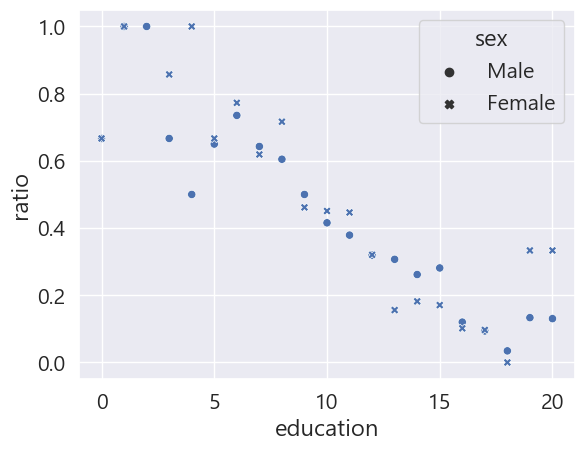

In [157]:
#교육수준이 높을수록 찬성 비율이 감소하고 있음(음의 상관관계)
sns.scatterplot(x="education", y="ratio", style="sex",
data=df_wrole)
plt.grid(True)
plt.show()

In [158]:
model_wrole = sm.Logit.from_formula("ratio ~ education + sex", df_wrole)
result_wrole = model_wrole.fit()
print(result_wrole.summary())
#성별은 유의하지 않음

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.3435
Time:                        15:39:55   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

In [159]:
#성별을 제거한 모형
model_wrole2 = sm.Logit.from_formula("ratio ~ education", df_wrole)
result_wrole2 = model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.3422
Time:                        15:39:56   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

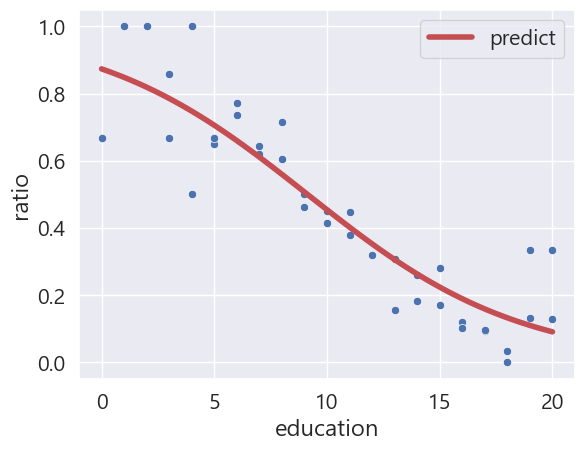

In [160]:
import pandas as pd
sns.scatterplot(x="education", y="ratio", data=df_wrole)
xx = np.linspace(0, 20, 100)
df_wrole_p = pd.DataFrame({"education": xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p), "r-", lw=4,
label="predict")
plt.legend()
plt.show()

##### 오존량 예측

In [161]:
df = pd.read_csv("c:/vscode/data/ozone/ozone2.csv")

In [162]:
#오존량 분류를 기준으로 한 평균값들
df.groupby("Result").mean()

,Ozone,Solar.R,Wind,Temp,Month,Day
Result,,,,,,
0,20.902778,166.302702,11.270833,72.652778,6.972222,15.180556
1,60.997339,203.379334,8.790123,82.530864,7.012346,16.358025


Text(0, 0.5, '빈도')

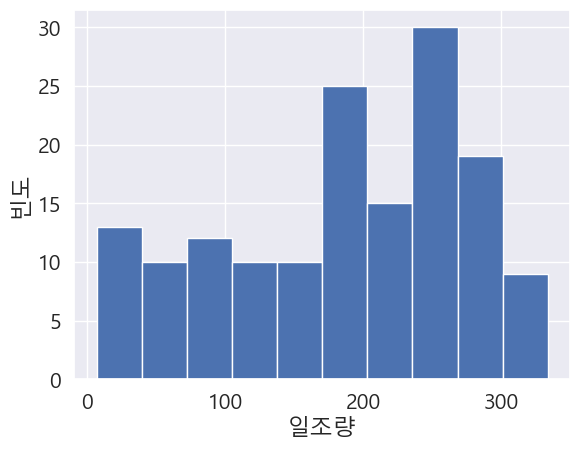

In [163]:
df["Solar.R"].hist()
plt.xlabel('일조량')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

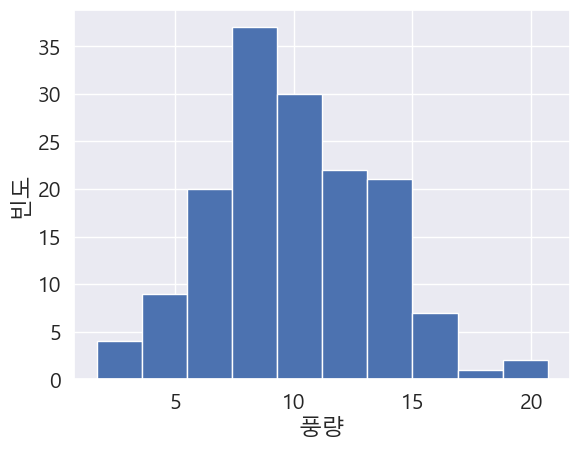

In [164]:
df["Wind"].hist()
plt.xlabel('풍량')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

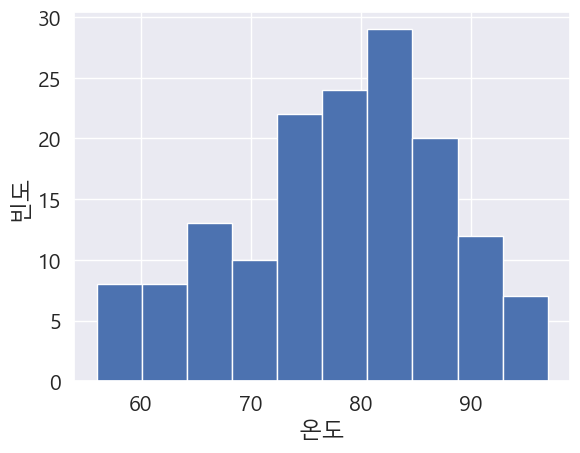

In [165]:
df["Temp"].hist()
plt.xlabel('온도')
plt.ylabel('빈도')

In [166]:
df["Result"].value_counts()

1    81
0    72
Name: Result, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족 || 1: 정상)')

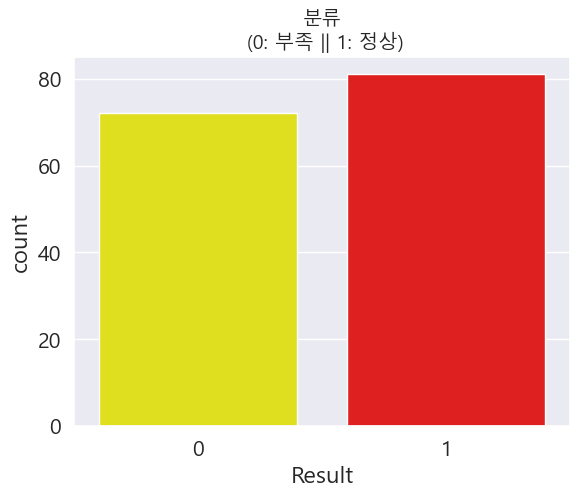

In [167]:
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족 || 1: 정상)', fontsize=14)
#불균형 데이터셋

In [168]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["Result"].value_counts()

0    72
1    72
Name: Result, dtype: int64

In [169]:
#오버샘플링
from imblearn.over_sampling import SMOTE
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

X_sample,y_sample=SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df3=pd.concat([X_samp,y_samp],axis=1)
df3["Result"].value_counts()

0    81
1    81
Name: Result, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


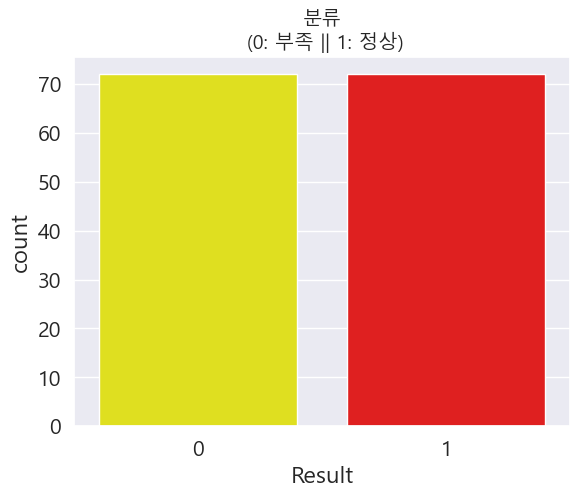

In [170]:
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('Result', data=df2, palette=colors)
plt.title('분류\n (0: 부족 || 1: 정상)', fontsize=14)
cols=['Solar.R', 'Wind', 'Temp']
X = X_samp[cols]
y = y_samp['Result']

In [171]:
import statsmodels.api as sm
#특정한 변수에서 값의 비율이 너무 낮은 경우 에러가 발생할 수 있음
#model=sm.Logit(y,X,method='bfgs')
X=X_samp[['Solar.R', 'Wind', 'Temp']]
model=sm.Logit(y,X)
result=model.fit()
#summary()에 표현되지 않는 값이 있을 경우 summary2() 사용
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.578389
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  162
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.1656
Time:                        15:39:57   Log-Likelihood:                -93.699
converged:                       True   LL-Null:                       -112.29
Covariance Type:            nonrobust   LLR p-value:                 8.435e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Solar.R        0.0035      0.002      1.721      0.085      -0.000       0.008
Wind          -0.2730      0.

In [172]:
#pvalue가 0.05보다 큰 값들을 제거
cols=['Wind', 'Temp']
X=X_samp[cols]
y=y_samp['Result']
df2=pd.concat([X,y],axis=1)

In [173]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.587764
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.152     
Dependent Variable: Result           AIC:              194.4356  
Date:               2023-03-30 15:39 BIC:              200.6108  
No. Observations:   162              Log-Likelihood:   -95.218   
Df Model:           1                LL-Null:          -112.29   
Df Residuals:       160              LLR p-value:      5.1178e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Wind      -0.2610     0.0523   -4.9950   0.0000   -0.3635   -0.1586
Temp       0.0342     0.0069    4.9515   0.0000    0.0206 

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.8217054263565892
검증용: 0.5757575757575758


In [175]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[ 7,  7],
       [ 7, 12]], dtype=int64)

In [176]:
df_cm=pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
df_cm

,0,1
0,7,7
1,7,12


<AxesSubplot:title={'center':'Confusion Matrix'}>

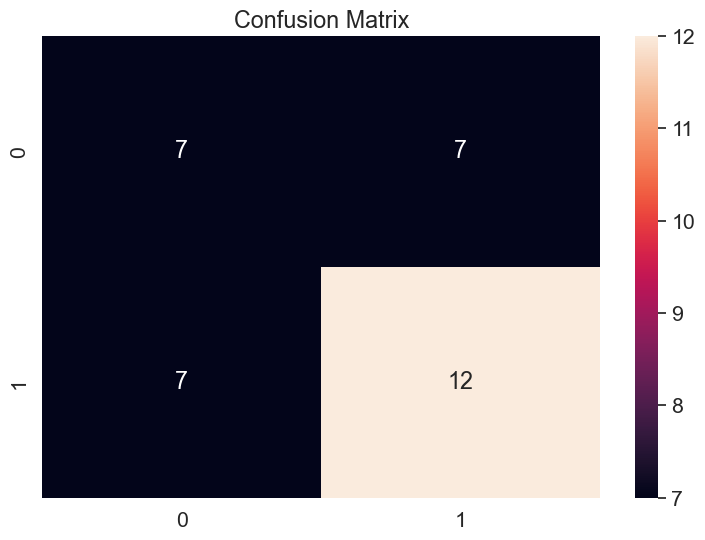

In [177]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

#### 로지스틱 회귀 모형의 cost

In [178]:
df = pd.read_csv("c:/vscode/data/titanic/train3.csv")

In [179]:
cols=['Pclass1', 'Pclass2', 'Pclass3', 'male',
'female', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[cols] # 독립변수
y = df["Survived"]

In [180]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Survived'])
df2 = pd.concat([X_samp, y_samp], axis=1)
X = X_samp[cols]
y = y_samp['Survived']

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1000.0, random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('오분류 샘플개수 : %d' % (y_test != pred).sum())

오분류 샘플개수 : 27


In [182]:
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test, pred))
print("Precision : %.3f" % precision_score(y_test, pred))   #모형의 정확도
print("Recall : %.3f" % recall_score(y_test, pred))         #실제현상 설명
print("F1 : %.3f" % f1_score(y_test, pred))

Accuracy: 0.80
Precision : 0.806
Recall : 0.794
F1 : 0.800


In [183]:
from sklearn.metrics import confusion_matrix
y = [1, 0, 1, 1, 0, 1]
pred = [0, 0, 1, 1, 0, 1]
cm=confusion_matrix(y, pred)
print(cm)

[[2 0]
 [1 3]]


In [184]:
# TN(True Negative) : 0을 0으로 맞춘 경우
# FP(False Positive) : 0인데 1로 틀린 경우
# FN(False Negative) : 1인데 0으로 틀린 경우
# TP(True Positive) : 1을 1로 맞춘 경우
# ravel() 다차원배열을 1차원배열로 변환
tn,fp,fn,tp = confusion_matrix(y, pred).ravel()
print(tn,fp,fn,tp)

2 0 1 3


In [185]:
# precision(정확도, 정밀도) : 모델이 True라고 분류한 것 중에서 실제 True의 비율
# tp / (tp+fp)
y = [0, 1, 0, 0]
pred = [0, 1, 1, 0]
# 모델이 2개를 1로 분류하였으나 실제 1인 개수는 1이므로 정밀도는 0.5
ps=precision_score(y, pred)
print(ps)

0.5


In [186]:
# recall(재현율, 검출율) : 실제값이 True인 것 중에서 모델이 True라고 예측한 것의 비율
# tp / (tp+fn)
# precision은 모델의 입장에서 recall은 실제 정답의 입장에서(바라보고자 하는 관점이 다름)
# 일반적으로 precision과 recall은 반비례 관계
y = [0, 1, 1, 0]
pred = [0, 1, 0, 0]
# 실제값이 1인 개수 2, 모델이 1로 맞춘 개수 1
recall_score(y, pred)

0.5

In [187]:
from sklearn.metrics import classification_report
# f1-score : precision과 recall의 조화평균(불균형 데이터셋에 많이 사용하는 평가 지표)
# 2*p*r / p+r
# support : 실제값의 개수(0이 1개, 1이 3개)
# accuracy : 정확도
# macro avg : 단순평균(모든 클래스를 동일한 비중으로 고려)
# weighted avg : 각 클래스에 속하는 표본의 개수로 가중평균(f1-score와 같은 값)
y = np.array([0, 1, 1, 1])
pred = np.array([0, 1, 0, 0])
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [192]:
# Cost : 기본값 1.0 (오차에 대한 패널티)
# Cost가 크면 과대적합
# Cost가 낮으면 과소적합
# 실험을 통해 최적의 Cost 값을 얻어내는 코드
costs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
results=[]
for c in costs:
    params = {'C':c, 'max_iter': 1000}
    model = LogisticRegression(**params).fit(X_train, y_train)
    score=model.score(X_test,y_test)
    results.append(score)
print(results)

[0.6496350364963503, 0.781021897810219, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971, 0.8029197080291971]


최고 정확도: 0.8029197080291971
최적의 C: 0.1


Text(0, 0.5, 'Accuracy')

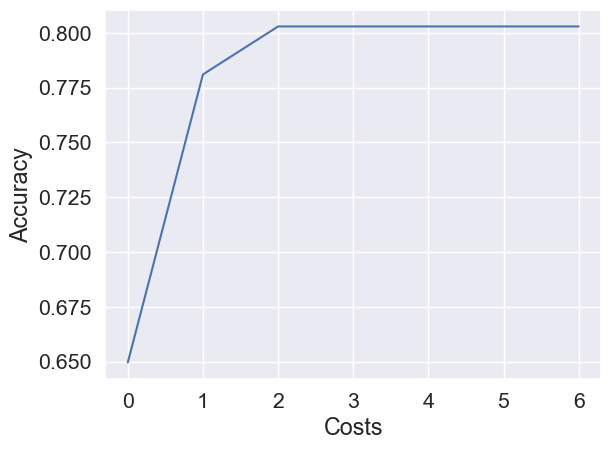

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
m=max(results)
for i,a in enumerate(results):
    if a==m:
        n=i
        break
print('최고 정확도:',m)
print('최적의 C:',costs[n])
plt.rcParams["font.size"]=15
plt.plot(range(len(costs)), results)
plt.xlabel('Costs')
plt.ylabel('Accuracy')

#### class-weight

In [1]:
import pandas as pd
df = pd.read_csv("c:/vscode/data/iris.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [15]:
#처음 40행 제거
df2=df.drop(df.index[range(40)])
df2.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Species'],
      dtype='object')

In [16]:
cols=['SepalLength','SepalWidth','PetalLength', 'PetalWidth']
X = df2[cols]
y = df2['Species']
df2.Species.value_counts() #불균형 데이터셋

1    50
2    50
0    10
Name: Species, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'iris\n (0: setosa, 1: versicolor, 2: virginica )')

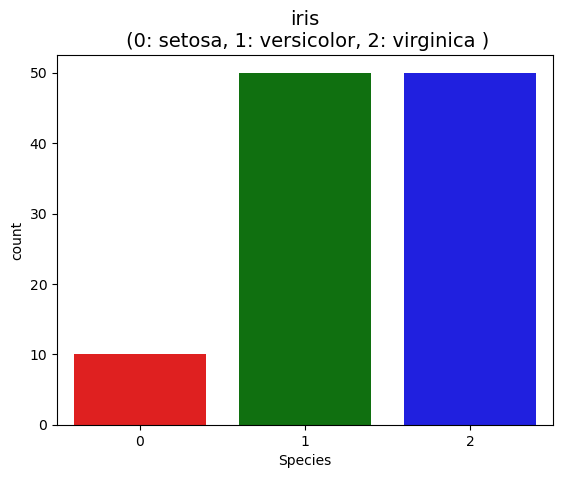

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["red", "green", "blue"]
sns.countplot('Species', data=df2, palette=colors)
plt.title('iris\n (0: setosa, 1: versicolor, 2: virginica )',
fontsize=14)

In [ ]:
#불균형 데이터셋의 경우 언더샘플링 또는 오버샘플링을 하는 것이 일반적인 방법이지만
#여기서는 class_weight 속성을 알아보기 위해 샘플링 과정을 생략함

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train.value_counts()

1    40
2    40
0     8
Name: Species, dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression

#기본 옵션 : 모든 클래스에 1이 부여됨(가중치 없음)
logit1 = LogisticRegression(random_state=0)
#샘플수에 반비례하는 가중치를 n_samples / (n_classes *np.bincount (y))로 자동 조정
# class_weight='balanced'일 경우 샘플 개수에 반비례하는 가중치가 곱해짐
logit2 = LogisticRegression(random_state=0, class_weight='balanced')
#가중치를 직접 입력하는 옵션
logit3 = LogisticRegression(random_state=0, class_weight={0:3, 1:1, 2:2})


import numpy as np

print(np.bincount(y)) # 샘플의 개수(10/50/50)
#샘플수에 반비례하는 가중치를 n_samples / (n_classes *np.bincount (y))로 자동 조정
print(88 / (3 * np.bincount(y)))

[10 50 50]
[2.93333333 0.58666667 0.58666667]


In [7]:
for logit in [logit1,logit2,logit3]:
    logit.fit(X_train, y_train)
    print(logit)
    print("학습용:",logit.score(X_train, y_train))
    print("검증용:",logit.score(X_test, y_test))
    print()
# logit3 모형은 class 0의 샘플수가 너무 적으므로 경고 메시지가 출력될 수 있음

LogisticRegression(random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight='balanced', random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(class_weight={0: 3, 1: 1, 2: 2}, random_state=0)
학습용: 0.9545454545454546
검증용: 1.0



In [18]:
from sklearn.linear_model import LogisticRegression
models = [LogisticRegression(random_state=0, penalty='l1',solver='liblinear'),
#기본옵션
LogisticRegression(random_state=0,penalty='l2',max_iter=1000),
LogisticRegression(random_state=0, penalty='elasticnet',solver='saga', l1_ratio=1, max_iter=5000),
LogisticRegression(random_state=0, penalty='none')]

In [19]:
for logit in models:
    print(logit)
    logit.fit(X_train, y_train)
    print("학습용:",logit.score(X_train, y_train))
    print("검증용:",logit.score(X_test, y_test))
    print()

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')
학습용: 0.9431818181818182
검증용: 1.0

LogisticRegression(max_iter=1000, random_state=0)
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(l1_ratio=1, max_iter=5000, penalty='elasticnet',
                   random_state=0, solver='saga')
학습용: 0.9545454545454546
검증용: 1.0

LogisticRegression(penalty='none', random_state=0)
학습용: 0.9772727272727273
검증용: 1.0



#### penalty

In [9]:
df = pd.read_csv("c:/vscode/data/iris.csv")
cols=['SepalLength', 'SepalWidth', 'PetalLength','PetalWidth']
X=df[cols]
y=df['Species']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
y_train.value_counts()

0    40
1    40
2    40
Name: Species, dtype: int64

In [ ]:
# 회귀계수들이 학습용 데이터에 과적합이 되지 않도록 정규화 요소를 더해주는 기법
# 과적합이 발생할 수 있는 수치에 Penalty를 부여하는 방식
# l1, l2, elasticnet, none

# l1 : 오차의 절대값에 페널티를 부여
# LASSO(Least Absolute Shrinkage Selector Operator) Penalty
# 변수들이 많을 경우 실질적으로 영향을 미치는 변수의 개수는 적을 것이라는 가정
# 영향이 적은 변수들을 0으로 보내서 없애고 영향력이 큰 변수들만 선택
# 모형을 단순화시켜 해석이 용이함

# l2 : 오차를 제곱한 값에 페널티를 부여(일반적으로 사용하는 방식)
# Ridge Penalty
# 변수들 간의 공선성 구조가 있을 때 사용
# 공선성이 있을 경우 변수는 많지만 실제 사용가능한 정보는 적음
# 변수들간의 분산을 감소시키는 기능

# elasticnet : LASSO와 Ridge의 혼합형
# 변수도 줄이고 분산도 줄이고 싶은 경우에 사용

# none : penalty를 사용하지 않음
# solver : 최적화(최적의 가중치를 설정)에 사용할 알고리즘(newton-cg, lbfgs, liblinear, sag, saga )
# lbfgs(Limited Memory Broyden–Fletcher–Goldfarb–Shanno) : 기본값
# liblinear : small dataset에 적합
# sag(Stochastic Average Gradient descent), saga(Variant of Sga) : big dataset에 적합
# newton-cg, saga, lbfgs : multi class 지원

In [11]:
from sklearn.linear_model import LogisticRegression
models = [LogisticRegression(random_state=0, penalty='l1',solver='liblinear'),
#기본옵션
LogisticRegression(random_state=0,penalty='l2',max_iter=1000),
LogisticRegression(random_state=0, penalty='elasticnet',solver='saga', l1_ratio=1, max_iter=5000),
LogisticRegression(random_state=0, penalty='none')
]

In [14]:
for logit in models:
    print(logit)
    logit.fit(X_train, y_train)
    print("학습용:",logit.score(X_train, y_train))
    print("검증용:",logit.score(X_test, y_test))
    print()

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')
학습용: 0.9583333333333334
검증용: 0.9666666666666667

LogisticRegression(max_iter=1000, random_state=0)
학습용: 0.9666666666666667
검증용: 1.0

LogisticRegression(l1_ratio=1, max_iter=5000, penalty='elasticnet',
                   random_state=0, solver='saga')
학습용: 0.95
검증용: 1.0

LogisticRegression(penalty='none', random_state=0)
학습용: 0.9833333333333333
검증용: 1.0



#### 불균형 데이터셋 >> 샘플링

In [20]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=2,
        n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0,
        random_state=1)
dfX=pd.DataFrame(X,columns=['a','b'])
dfy=pd.DataFrame(y,columns=['y'])
df=pd.concat([dfX,dfy],axis=1)
df

,a,b,y
0,0.222014,0.540207,0
1,1.347439,1.412824,0
2,0.537238,0.372730,0
3,2.134462,1.404819,0
4,2.315827,1.356858,0
...,...,...,...
9995,2.440385,1.695643,0
9996,-0.790502,0.194243,0
9997,1.878130,0.829500,0
9998,2.585933,1.927995,0


In [21]:
X1 = df[['a','b']] # 독립변수
y1 = df["y"]
df["y"].value_counts() #불균형 데이터셋

0    9900
1     100
Name: y, dtype: int64

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1,
                                    test_size=0.2, stratify=y1, random_state=10)

In [23]:
#불균형 데이터셋으로 만든 모형
model1 = LogisticRegression(random_state=0)
model1.fit(X_train, y_train)
print("학습용:",model1.score(X_train, y_train))
print("검증용:",model1.score(X_test, y_test))

학습용: 0.994125
검증용: 0.995


In [24]:
pred1=model1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred1)
cm
# score는 0.9945로 높으나 recall의 경우 10/(10+10) = 0.5로 낮아지는 문제가 발생함

array([[1980,    0],
       [  10,   10]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report
#소수 클래스의 정확도와 precision, precision,recall,f1-score 확인
print(classification_report(y_test, pred1))
#모형의 전반적인 정확도(accuracy)는 높지만 소수 클래스의 재현율(recall)이 0.5로 낮은 문제점

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1980
           1       1.00      0.50      0.67        20

    accuracy                           0.99      2000
   macro avg       1.00      0.75      0.83      2000
weighted avg       1.00      0.99      0.99      2000



In [27]:
#균형 데이터
X, y = make_classification(n_samples=10000, n_features=2,
n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=1)
dfX=pd.DataFrame(X,columns=['a','b'])
dfy=pd.DataFrame(y,columns=['y'])
df2=pd.concat([dfX,dfy],axis=1)
df2["y"].value_counts()

0    5000
1    5000
Name: y, dtype: int64

In [28]:
X2 = df2[['a','b']] # 독립변수
y2 = df2["y"]
X_train, X_test, y_train, y_test = train_test_split(X2, y2,
test_size=0.2, stratify=y2, random_state=10)

model2 = LogisticRegression(random_state=42)
model2.fit(X_train, y_train)
print("학습용:",model2.score(X_train, y_train))
print("검증용:",model2.score(X_test, y_test))

학습용: 0.896125
검증용: 0.891


In [29]:
pred2=model2.predict(X_test)
print(classification_report(y_test, pred2))
#정확도와 재현율이 비슷하게 처리됨

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1000
           1       0.90      0.87      0.89      1000

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



* 언더샘플링

In [32]:
#비대칭 데이터는 언더샘플링, 오버샘플링, 복합샘플링 등의 방법으로 데이터 비율을 맞추면 정밀도가 향상된다.
X, y = make_classification(n_samples=10000,
n_features=2, n_redundant=0, n_clusters_per_class=1,
weights=[0.99], flip_y=0, random_state=1)

#1언더샘플링
#1-1무작위로 다수 클래스의 데이터를 없애는 단순 샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )
y_samp = pd.DataFrame(data=y_sample,columns=['y'])
y_samp.y.value_counts()

X_train, X_test, y_train, y_test = train_test_split(X_samp,y_samp, test_size=0.2,
stratify=y_samp,random_state=10)
model3 = LogisticRegression(random_state=42)
model3.fit(X_train, y_train)
print("학습용:",model3.score(X_train, y_train))
print("검증용:",model3.score(X_test, y_test))

pred3=model3.predict(X_test)
print(classification_report(y_test, pred3))

학습용: 0.8625
검증용: 0.925
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.90      0.95      0.93        20

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.92        40



c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
#1-2 토멕링크(Tomek's link) : 서로 다른 클래스에 속하는 한쌍의 데이터
# 토멕링크 중에서 다수 클래스에 속한 샘플을 제거함으로써 데이터의 균형을 맞추는 방법
# 'majority': 다수 클래스의 샘플을 제거
# 'not minority': 소수 클래스를 제외하고 샘플링
# 'not majority': 다수 클래스를 제외하고 샘플링
# 'all': 모든 클래스를 샘플링
# 'auto': not minority와 같음(기본 옵션)

from imblearn.under_sampling import TomekLinks
X_sample,y_sample=TomekLinks(sampling_strategy='majority').fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )
y_samp = pd.DataFrame(data=y_sample,columns=['y'])
print(y_samp.y.value_counts())
print()
#토멕링크 중에서 다수 클래스의 샘플들을 제거하는 방식, 1:1로 맞추는 방식은 아님

X_train, X_test, y_train, y_test = train_test_split(X_samp,y_samp, test_size=0.2,
stratify=y_samp,random_state=10)
model3 = LogisticRegression(random_state=42)
model3.fit(X_train, y_train)
print("학습용:",model3.score(X_train, y_train))
print("검증용:",model3.score(X_test, y_test))
print()

pred3=model3.predict(X_test)
print(classification_report(y_test, pred3))

0    9874
1     100
Name: y, dtype: int64

학습용: 0.9942348665246271
검증용: 0.9959899749373433

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1975
           1       1.00      0.60      0.75        20

    accuracy                           1.00      1995
   macro avg       1.00      0.80      0.87      1995
weighted avg       1.00      1.00      1.00      1995



c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
#1-3 CNN(Condensed Nearest Neighbour) : 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법
#다수의 데이터 중에서 하나를 골라서 최근접 이웃이 다수 클래스이면 그 샘플을 빼는 방식
#시간이 많이 걸림
from imblearn.under_sampling import CondensedNearestNeighbour
X_sample, y_sample = CondensedNearestNeighbour(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )
y_samp = pd.DataFrame(data=y_sample,columns=['y'])
#1:1로 맞춰지지는 않음
print(y_samp.y.value_counts())
print()

X_train, X_test, y_train, y_test = train_test_split(X_samp,y_samp, test_size=0.2,
stratify=y_samp,random_state=10)
model3 = LogisticRegression(random_state=42)
model3.fit(X_train, y_train)
print("학습용:",model3.score(X_train, y_train))
print("검증용:",model3.score(X_test, y_test))
print()

pred3=model3.predict(X_test)
print(classification_report(y_test, pred3))

c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

0    187
1    100
Name: y, dtype: int64

학습용: 0.8209606986899564
검증용: 0.8793103448275862

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.84      0.80      0.82        20

    accuracy                           0.88        58
   macro avg       0.87      0.86      0.86        58
weighted avg       0.88      0.88      0.88        58



c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
# 1-4 One Sided Selection
# 토맥링크 방법과 Condensed Nearest Neighbour 방법을 섞은 방식
# 토맥링크 중 다수 클래스의 샘플을 제거하고
# 나머지 데이터 중에서도 서로 붙어있는 다수 클래스 데이터는 1-NN 방법으로 제외하는 방식
from imblearn.under_sampling import OneSidedSelection
X_sample, y_sample = OneSidedSelection(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )
y_samp = pd.DataFrame(data=y_sample,columns=['y'])
print(y_samp.y.value_counts())
print()

X_train, X_test, y_train, y_test = train_test_split(X_samp,y_samp, test_size=0.2,
stratify=y_samp,random_state=10)
model3 = LogisticRegression(random_state=42)
model3.fit(X_train, y_train)
print("학습용:",model3.score(X_train, y_train))
print("검증용:",model3.score(X_test, y_test))
print()

pred3=model3.predict(X_test)
print(classification_report(y_test, pred3))

c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0    6593
1     100
Name: y, dtype: int64

학습용: 0.9921553978333956
검증용: 0.9925317401045557

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1319
           1       1.00      0.50      0.67        20

    accuracy                           0.99      1339
   macro avg       1.00      0.75      0.83      1339
weighted avg       0.99      0.99      0.99      1339



c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
# 1-5 ENN(Edited Nearest Neighbours)
# 다수 클래스 데이터 중 소수 클래스와 가장 가까운 k(n_neighbors)개의 데이터가
# 모두 또는 다수 클래스가 아니면 삭제하는 방법
# 소수 클래스 주변의 다수 클래스 데이터는 삭제됨
from imblearn.under_sampling import EditedNearestNeighbours
#kind_sel='all' 모두, kind_sel='mode' 다수
# 5개의 이웃이 모두 같은 클래스가 아니면 그 샘플을 제거함
X_sample, y_sample= EditedNearestNeighbours(kind_sel="all",
n_neighbors=5).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )
y_samp = pd.DataFrame(data=y_sample,columns=['y'])
print(y_samp.y.value_counts())
print()

X_train, X_test, y_train, y_test = train_test_split(X_samp,y_samp, test_size=0.2,
stratify=y_samp,random_state=10)
model3 = LogisticRegression(random_state=42)
model3.fit(X_train, y_train)
print("학습용:",model3.score(X_train, y_train))
print("검증용:",model3.score(X_test, y_test))
print()

pred3=model3.predict(X_test)
print(classification_report(y_test, pred3))

0    9747
1     100
Name: y, dtype: int64

학습용: 0.9955566840167577
검증용: 0.9944162436548223

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1950
           1       1.00      0.45      0.62        20

    accuracy                           0.99      1970
   macro avg       1.00      0.72      0.81      1970
weighted avg       0.99      0.99      0.99      1970



c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
# 1-6 Neighbourhood Cleaning Rule
# CNN(Condensed Nearest Neighbour) 방법과 ENN(Edited Nearest Neighbours) 방법을 섞은 것
from imblearn.under_sampling import NeighbourhoodCleaningRule
#kind_sel='all' 모두, kind_sel='mode' 다수
X_sample,y_sample=NeighbourhoodCleaningRule(kind_sel="all",
n_neighbors=5).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )
y_samp = pd.DataFrame(data=y_sample,columns=['y'])
print(y_samp.y.value_counts())
print()

X_train, X_test, y_train, y_test = train_test_split(X_samp,y_samp, test_size=0.2,
stratify=y_samp,random_state=10)
model3 = LogisticRegression(random_state=42)
model3.fit(X_train, y_train)
print("학습용:",model3.score(X_train, y_train))
print("검증용:",model3.score(X_test, y_test))
print()

pred3=model3.predict(X_test)
print(classification_report(y_test, pred3))

0    9721
1     100
Name: y, dtype: int64

학습용: 0.9950356415478615
검증용: 0.9969465648854962

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1945
           1       1.00      0.70      0.82        20

    accuracy                           1.00      1965
   macro avg       1.00      0.85      0.91      1965
weighted avg       1.00      1.00      1.00      1965



c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* 오버샘플링

In [51]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1,
        weights=[0.99], flip_y=0, random_state=1)

#2-1 무작위로 소수 클래스의 데이터를 복제하여 늘리는 방식
#정보가 손실되지 않으나 과적합이 될 수 있음
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
X_sample, y_sample = RandomOverSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )
y_samp = pd.DataFrame(data=y_sample,columns=['y'])
print(y_samp.y.value_counts())
print()

X_train, X_test, y_train, y_test = train_test_split(X_samp,y_samp, test_size=0.2,
stratify=y_samp,random_state=10)
model3 = LogisticRegression(random_state=42)
model3.fit(X_train, y_train)
print("학습용:",model3.score(X_train, y_train))
print("검증용:",model3.score(X_test, y_test))
print()

pred3=model3.predict(X_test)
print(classification_report(y_test, pred3))

0    9900
1    9900
Name: y, dtype: int64

학습용: 0.8955176767676768
검증용: 0.8987373737373737

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1980
           1       0.91      0.88      0.90      1980

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
#2-2 ADASYN(Adaptive Synthetic Sampling)
# 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중
# 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법
from imblearn.over_sampling import ADASYN
import pandas as pd
X_sample, y_sample = ADASYN(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )
y_samp = pd.DataFrame(data=y_sample,columns=['y'])
print(y_samp.y.value_counts())
print()

X_train, X_test, y_train, y_test = train_test_split(X_samp,y_samp, test_size=0.2,
stratify=y_samp,random_state=10)
model3 = LogisticRegression(random_state=42)
model3.fit(X_train, y_train)
print("학습용:",model3.score(X_train, y_train))
print("검증용:",model3.score(X_test, y_test))
print()

pred3=model3.predict(X_test)
print(classification_report(y_test, pred3))

0    9900
1    9899
Name: y, dtype: int64

학습용: 0.8391943935854537
검증용: 0.8424242424242424

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1980
           1       0.85      0.83      0.84      1980

    accuracy                           0.84      3960
   macro avg       0.84      0.84      0.84      3960
weighted avg       0.84      0.84      0.84      3960



c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
# SMOTE(Synthetic Minority Over-sampling Technique) : 가장 많이 사용되고 있는 방식
# 소수 클래스의 샘플의 k 최근접 이웃을 찾는다.
# 현재 샘플과 k개 이웃 간의 거리를 구하고
# 거리에 0 ~ 1 사이의 임의의 값을 곱하여 소수 클래스의 샘플에 추가
# 결과적으로 소수 클래스의 샘플을 주변의 이웃을 고려해 약간씩 이동시킨 포인트들을 추가하는 방식
from imblearn.over_sampling import SMOTE
import pandas as pd
X_sample, y_sample = SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )
y_samp = pd.DataFrame(data=y_sample,columns=['y'])
print(y_samp.y.value_counts())
print()

X_train, X_test, y_train, y_test = train_test_split(X_samp,y_samp, test_size=0.2,
stratify=y_samp,random_state=10)
model3 = LogisticRegression(random_state=42)
model3.fit(X_train, y_train)
print("학습용:",model3.score(X_train, y_train))
print("검증용:",model3.score(X_test, y_test))
print()

pred3=model3.predict(X_test)
print(classification_report(y_test, pred3))

0    9900
1    9900
Name: y, dtype: int64

학습용: 0.9096590909090909
검증용: 0.9085858585858586

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1980
           1       0.92      0.89      0.91      1980

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* 복합 샘플링

In [54]:
# SMOTE+ENN : SMOTE와 ENN을 섞은 방식
# SMOTE : 소수 클래스의 샘플을 주변의 이웃을 고려해 약간씩 이동시킨 포인트들을 추가
# ENN : 소수 클래스 주변의 다수 클래스 데이터를 삭제
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1,
        weights=[0.99], flip_y=0, random_state=1)

from imblearn.combine import SMOTEENN
import pandas as pd
X_sample, y_sample = SMOTEENN(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )
y_samp = pd.DataFrame(data=y_sample,columns=['y'])
print(y_samp.y.value_counts())
print()

X_train, X_test, y_train, y_test = train_test_split(X_samp,y_samp, test_size=0.2,
stratify=y_samp,random_state=10)
model3 = LogisticRegression(random_state=42)
model3.fit(X_train, y_train)
print("학습용:",model3.score(X_train, y_train))
print("검증용:",model3.score(X_test, y_test))
print()

pred3=model3.predict(X_test)
print(classification_report(y_test, pred3))

1    8941
0    8645
Name: y, dtype: int64

학습용: 0.9530850156383281
검증용: 0.9536668561682774

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1729
           1       0.95      0.96      0.95      1789

    accuracy                           0.95      3518
   macro avg       0.95      0.95      0.95      3518
weighted avg       0.95      0.95      0.95      3518



c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
# SMOTE+Tomek : SMOTE와 토멕링크 방법을 섞은 것
# SMOTE : 소수 클래스의 샘플을 주변의 이웃을 고려해 약간씩 이동시킨 포인트들을 추가
# 토멕링크 : 토멕링크 중에서 다수 클래스의 샘플들을 제거
from imblearn.combine import SMOTETomek
import pandas as pd
X_sample, y_sample = SMOTETomek(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=['a','b'] )
y_samp = pd.DataFrame(data=y_sample,columns=['y'])
print(y_samp.y.value_counts())
print()

X_train, X_test, y_train, y_test = train_test_split(X_samp,y_samp, test_size=0.2,
stratify=y_samp,random_state=10)
model3 = LogisticRegression(random_state=42)
model3.fit(X_train, y_train)
print("학습용:",model3.score(X_train, y_train))
print("검증용:",model3.score(X_test, y_test))
print()

pred3=model3.predict(X_test)
print(classification_report(y_test, pred3))

0    9653
1    9653
Name: y, dtype: int64

학습용: 0.9197099197099197
검증용: 0.923873640600725

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1931
           1       0.94      0.91      0.92      1931

    accuracy                           0.92      3862
   macro avg       0.92      0.92      0.92      3862
weighted avg       0.92      0.92      0.92      3862



c:\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 전처리 자동화와 교차검증

In [ ]:
from sklearn.datasets import fetch_openml
# https://www.openml.org/d/40945
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
df=pd.concat([X,y],axis=1)

In [57]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived'],
      dtype='object')

In [58]:
train_cols = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[train_cols] # 독립변수
y = df["survived"]
y.value_counts()

0    809
1    500
Name: survived, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

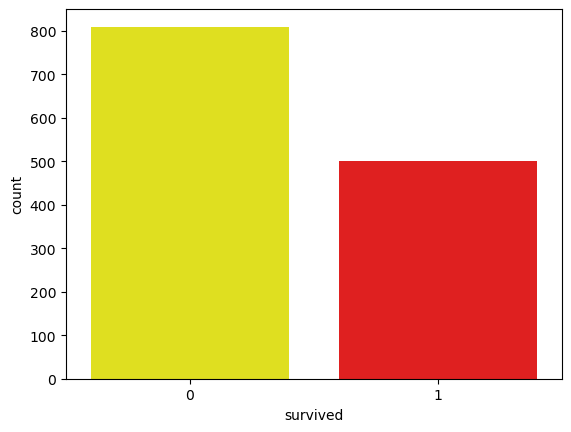

In [59]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["yellow", "red"]
sns.countplot('survived', data=df, palette=colors)

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


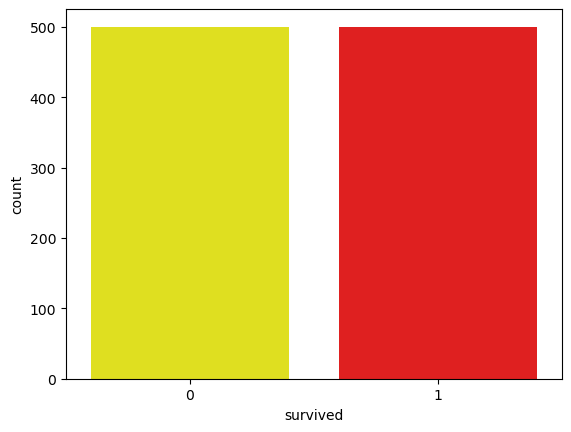

In [60]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['survived'])
df2=pd.concat([X_samp,y_samp],axis=1)

X = df2[train_cols] # 독립변수
y = df2["survived"]
y.value_counts()

colors = ["yellow", "red"]
sns.countplot('survived', data=df2, palette=colors)

X = X_samp[train_cols] # 독립변수
y = y_samp["survived"]

* 데이터 전처리 자동화

In [61]:
#연속된 변환을 순서대로 처리하는 클래스
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

In [70]:
#결측값 처리 - 나이, 요금(중위수로 처리)
#수치형 변수, 빈값채우기 & 스케일링
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())])
                    # 작업순서 ('변수명', 클래스)
#범주형 변수 - 원핫인코딩
# embarked: {'C', 'S', 'Q'}
# sex: {'female', 'male'}
# pclass: {1, 2, 3}
# handle_unknown='ignore' 변환 중에 에러가 발생할 경우 무시하고 계속 진행
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
# 수치형, 범주형 컬럼 변환
preprocessor = ColumnTransformer(transformers=[
                        ('num', numeric_transformer, numeric_features),
                        # '변수', 수치형변환 파이프라인, 변수목록
                        ('cat', categorical_transformer, categorical_features)])

# 전처리 후 로지스틱 회귀분석 분류모형
clf = Pipeline(steps=[('preprocessor', preprocessor),           #전처리 작업
                      ('classifier', LogisticRegression())])    # logit 모형
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked', 'se

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.76625
0.775


* 교차검증, 하이퍼 파라미터

In [65]:
#교차검증과 모형의 튜닝
#하이퍼 파라미터 최적화
from sklearn.model_selection import GridSearchCV
# 숫자 결측값 처리
# Cost
param_grid = {
'preprocessor__num__imputer__strategy': ['mean', 'median'],
'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X, y)
grid_search.cv_results_["params"]

scores=grid_search.cv_results_["mean_test_score"]
scores

array([0.727, 0.728, 0.748, 0.748, 0.75 , 0.75 , 0.754, 0.75 , 0.754,
       0.753, 0.754, 0.753, 0.754, 0.753])

In [68]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7540000000000001
{'classifier__C': 0.1, 'preprocessor__num__imputer__strategy': 'mean'}


0.7540000000000001


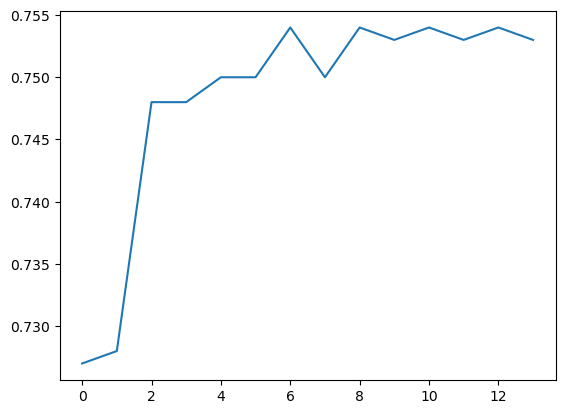

In [69]:
print(max(scores))
plt.plot(scores)


#### 붓꽃 품종 분류

In [71]:
df = pd.read_csv('c:/vscode/data/iris/iris.csv')

In [72]:
# 품종을 기준으로 한 평균값들
df.groupby('Species').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


Text(0, 0.5, 'SepalWidth')

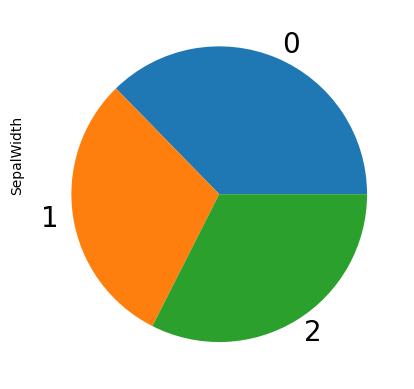

In [73]:
#파이차트
sums_by_species = df.groupby('Species').sum()
var = 'SepalWidth'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')

         SepalLength  SepalWidth  PetalLength  PetalWidth
Species                                                  
0              250.3       170.9         73.2        12.2
1              296.8       138.5        213.0        66.3
2              329.4       148.7        277.6       101.3


<AxesSubplot:xlabel='Species'>

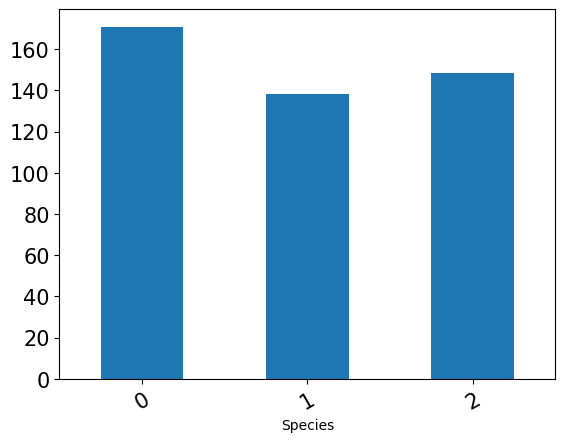

In [75]:
#품종별 변수 합계
sums_by_species = df.groupby('Species').sum()
print(sums_by_species)

var = 'SepalWidth'
#rot 글자회전(rotation)
#꽃받침 너비(cm) 기준 분류 그래프
sums_by_species[var].plot(kind='bar', fontsize=15, rot=30)

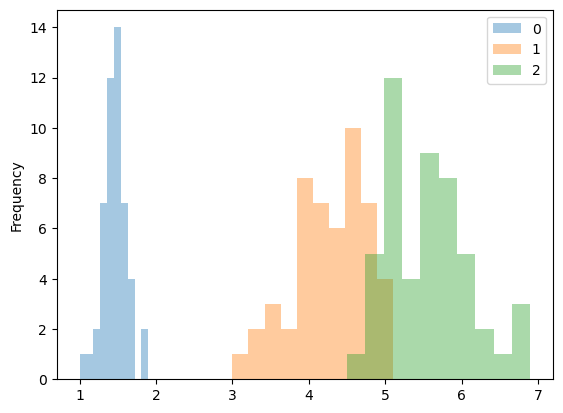

In [76]:
#품종별 꽃잎 길이
for spec in df['Species'].unique():
    subdf = df[df['Species']==spec]
    subdf['PetalLength'].plot(kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')

In [77]:
df["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: setosa, 1: versicolor, 2: virginica )')

c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


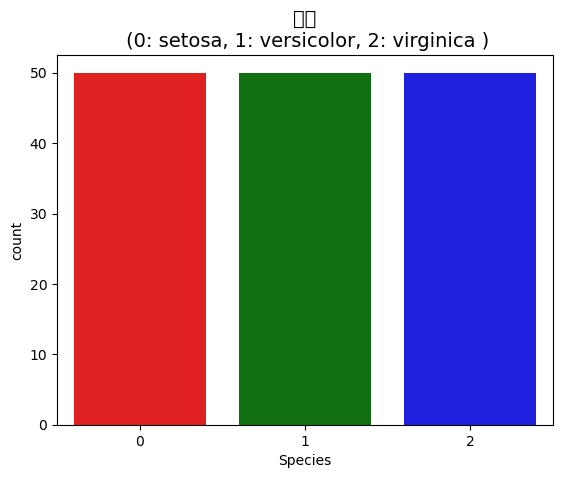

In [78]:
import seaborn as sns
colors = ["red", "green", "blue"]
sns.countplot('Species', data=df, palette=colors)
plt.title('분류\n (0: setosa, 1: versicolor, 2: virginica )', fontsize=14)

In [79]:
cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[cols]
y = df['Species']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.9666666666666667
검증용: 1.0


In [80]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [81]:
df_cm=pd.DataFrame(cm, index=[0, 1, 2], columns=[0, 1, 2])
df_cm

,0,1,2
0,10,0,0
1,0,10,0
2,0,0,10


<AxesSubplot:title={'center':'Confusion Matrix'}>

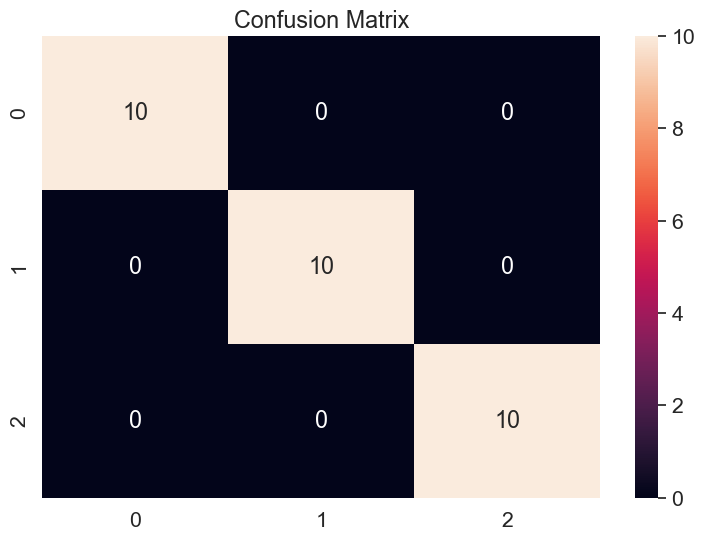

In [82]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

In [83]:
# 분류 모델로 예측하기
flowers=['setosa','versicolor','virginica']
X_new=[[7,3,5,1.4]]
pred=model.predict(X_new)
print(flowers[pred[0]])

versicolor


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [85]:
# 분류 모델 저장
import joblib
joblib.dump(model, 'c:/vscode/data/iris/iris_logit.model')

['c:/vscode/data/iris_logit.model']

In [86]:
# 모형 불러오기
import joblib
model=joblib.load('c:/vscode/data/iris/iris_logit.model')
#예측1
flowers=['setosa', 'versicolor', 'virginica']
X_new=[[7, 3.0, 5, 1.4]]
pred=model.predict(X_new)
print('품종:',flowers[pred[0]])
#예측2
X_new=[[5, 2.9, 1, 0.2]]
pred=model.predict(X_new)
print('품종:',flowers[pred[0]])

품종: versicolor
품종: setosa


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### 와인품질 분류

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
# csv 파일을 로딩
df = pd.read_csv("c:/vscode/data/wine/wine_new.csv")

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

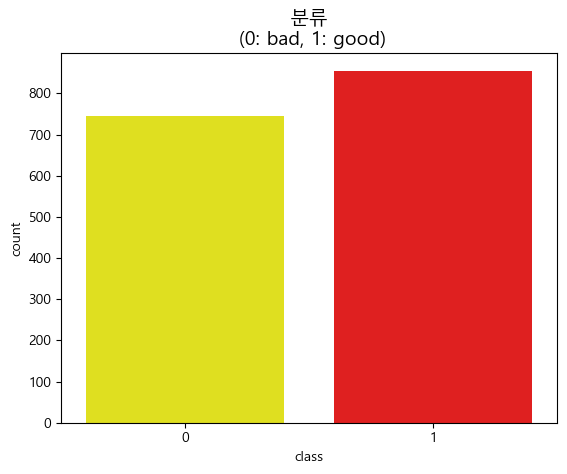

In [3]:
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('class', data=df, palette=colors)
plt.title('분류\n (0: bad, 1: good)', fontsize=14)

In [5]:
train_cols = df.columns[0:11] #0~10 필드

X = df[train_cols] # 독립변수
y = df["class"]

In [6]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [8]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["class"].value_counts()

0    855
1    855
Name: class, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

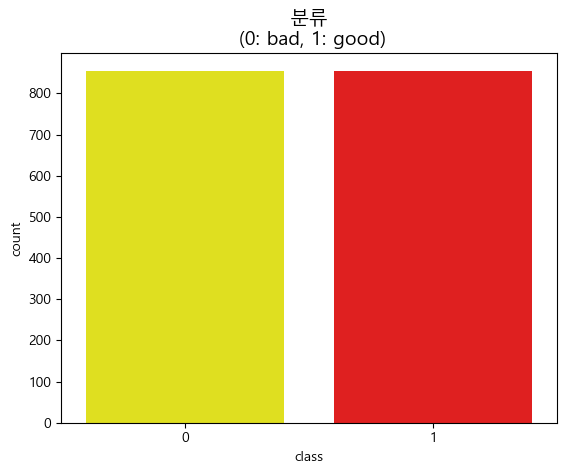

In [9]:
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('class', data=df2, palette=colors)
plt.title('분류\n (0: bad, 1: good)', fontsize=14)

In [10]:
train_cols = df.columns[0:11] #0~10 필드
X = X_samp[train_cols] # 독립변수
y = y_samp["class"]

In [11]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.515677
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.256      
Dependent Variable:  class             AIC:               1785.6143  
Date:                2023-04-03 11:37  BIC:               1845.5010  
No. Observations:    1710              Log-Likelihood:    -881.81    
Df Model:            10                LL-Null:           -1185.3    
Df Residuals:        1699              LLR p-value:       5.7110e-124
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed acidity         0.1118   0.0622  1.7970 0.0723  -0.0101  0.2338
volatile acidity

In [12]:
#pvalue가 0.05보다 큰 값들을 제거
cols=['volatile acidity', 'citric acid',
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
'sulphates', 'alcohol']
X=X_samp[cols]
y=y_samp['class']
df2=pd.concat([X,y],axis=1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.7426900584795322
검증용: 0.7309941520467836


In [19]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[138,  35],
       [ 57, 112]], dtype=int64)

In [20]:
df_cm=pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
df_cm

,0,1
0,138,35
1,57,112


<AxesSubplot:title={'center':'Confusion Matrix'}>

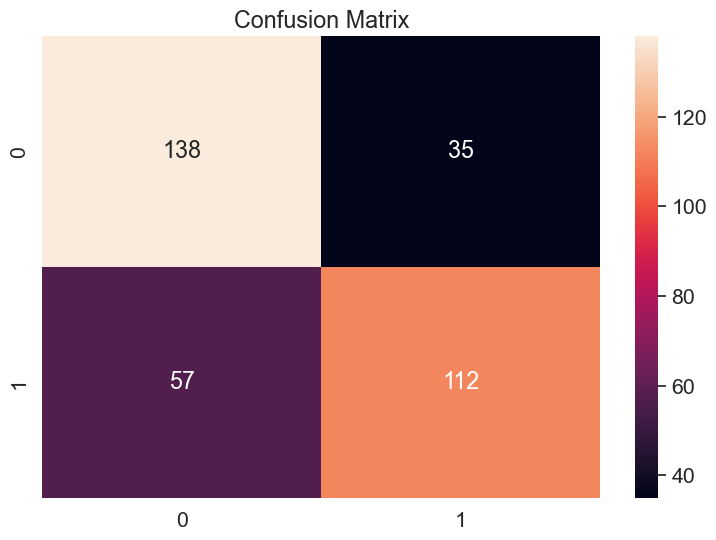

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt="d")

#### 타이타닉 생존자 분석

In [22]:
df = pd.read_csv("c:/vscode/data/titanic/train3.csv")

In [23]:
train_cols = df.columns[1:]
X = df[train_cols]
y = df['Survived']

In [25]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Survived'])
df2 = pd.concat([X_samp, y_samp], axis=1)

In [26]:
import statsmodels.api as sm

model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.442544
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.335     
Dependent Variable: Survived         AIC:              804.6126  
Date:               2023-04-03 12:15 BIC:              842.9514  
No. Observations:   891              Log-Likelihood:   -394.31   
Df Model:           7                LL-Null:          -593.33   
Df Residuals:       883              LLR p-value:      6.2705e-82
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass1    1.6206        nan       nan      nan       nan       nan
Pclass2    0.5957        nan       nan      nan       nan 

In [38]:
# pvalue가 0.05보다 큰 값들을 제거
train_cols = ['Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age', 'SibSp', 'Parch','Fare']
X = df[train_cols]
y = df['Survived']

In [39]:
model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.442544
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.335     
Dependent Variable: Survived         AIC:              804.6126  
Date:               2023-04-03 12:32 BIC:              842.9514  
No. Observations:   891              Log-Likelihood:   -394.31   
Df Model:           7                LL-Null:          -593.33   
Df Residuals:       883              LLR p-value:      6.2705e-82
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass1    1.6206        nan       nan      nan       nan       nan
Pclass2    0.5957        nan       nan      nan       nan 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print('학습용:', model.score(X_train, y_train))
print('검증용:', model.score(X_test, y_test))

학습용: 0.8033707865168539
검증용: 0.7988826815642458


In [41]:
#confusion matrix 출력
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[97, 13],
       [23, 46]], dtype=int64)

In [42]:
df_cm = pd.DataFrame(cm, index=['x', 'o'], columns=['x','o'])

<AxesSubplot:title={'center':'confusion matrix'}>

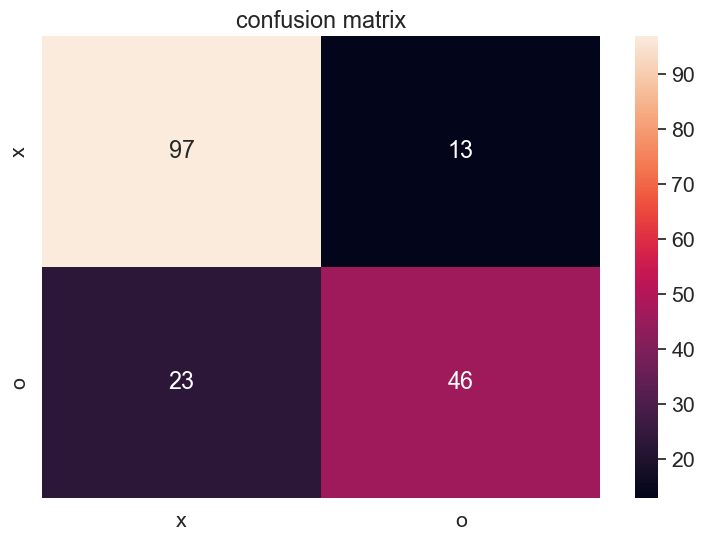

In [43]:
import seaborn as sns
from matplotlib import pyplot as pyplot

sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('confusion matrix')
sns.heatmap(df_cm, annot=True)

In [46]:
#3등석, 남성, 19세, 형제자매1, 부모자녀0, 요금50
person1 = [[0, 0, 1, 1, 0, 19, 1, 0, 50]]
#1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30
person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]
#2등석, 여성, 40세, 형제자매2, 부모자녀0, 요금20
person3 = [[0, 1, 0, 0, 1, 40, 2, 0, 70]]
print(model.predict(person1), model.predict_proba(person1))
print(model.predict(person2), model.predict_proba(person2))
print(model.predict(person3), model.predict_proba(person3))

[0] [[0.8835701 0.1164299]]
[1] [[0.04712738 0.95287262]]
[1] [[0.32441481 0.67558519]]


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with

In [45]:
import joblib
joblib.dump(model, 'c:/vscode/data/titanic/titanic_logit.model')

['c:/vscode/data/titanic/titanic_logit.model']

In [47]:
model=joblib.load('c:/vscode/data/titanic/titanic_logit.model')

#### bmi 분류 (랜덤데이터 생성)

In [48]:
import random
# BMI를 계산해서 레이블을 리턴하는 함수
# thin 1, normal 2, fat 3
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return "1"
    if bmi < 25: return "2"
    return "3"

In [49]:
# 출력 파일 준비하기
fp = open("c:/vscode/data/bmi/bmi.csv","w",encoding="utf-8")
fp.write("height,weight,label\n")

# 무작위로 데이터 생성하기
cnt = {"1":0, "2":0, "3":0}
for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write(f"{h},{w},{label}\n")

fp.close()
print(cnt,"건의 데이터가 생성되었습니다.")

{'1': 6384, '2': 5929, '3': 7687} 건의 데이터가 생성되었습니다.


In [50]:
# 데이터 로딩
df = pd.read_csv("c:/vscode/data/bmi/bmi.csv")
df.head()

,height,weight,label
0,140,56,3
1,121,79,3
2,148,58,3
3,170,79,3
4,151,80,3


In [51]:
train_cols = df.columns[0:2] #0,1 필드
X = df[train_cols] # 독립변수
y = df["label"]

In [52]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['label'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [53]:
train_cols = ['height', 'weight']
X = X_samp[train_cols] # 독립변수
y = y_samp["label"]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.9813760629699909
검증용: 0.9808881394041596


In [56]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[1168,   18,    0],
       [  19, 1154,   13],
       [   0,   18, 1168]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}>

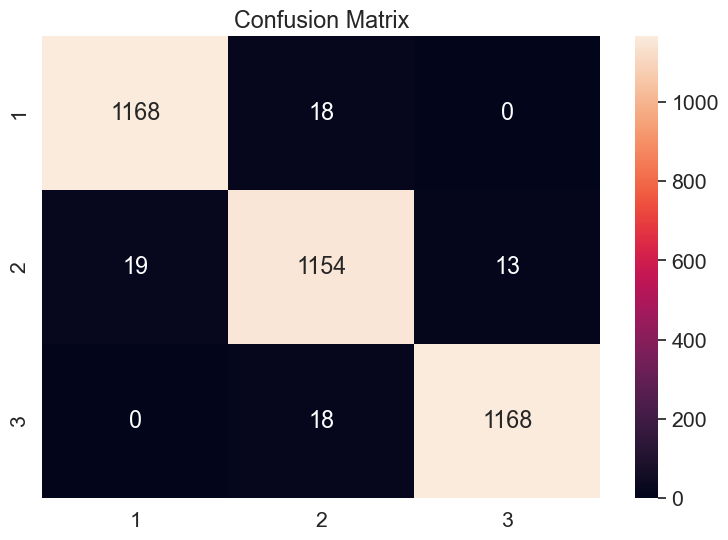

In [57]:
df_cm=pd.DataFrame(cm, index=[1,2,3],
columns=[1,2,3])

sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True,fmt="d")